# Capstone Project: Supervised Learning
### Building a Bank Marketing System

Goal is identify prospective customers that will subscribe to bank products.

## Data Exploration

Read and explore the banking dataset first.

In [1]:
# Import libraries
%matplotlib inline

import numpy as np
import pandas as pd
from __future__ import division
from sklearn import cross_validation
import matplotlib.pyplot as plt

/Users/egilmore/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
# Read bank data
bank_data = pd.read_csv("bank-full.csv", sep=';')
print "Bank data read successfully!"
# Note: The last column 'passed' is the target/label, all other are feature columns

Bank data read successfully!


Determine basics about the dataset:
- Total number of clients
- Number of clients that did subscribe to product
- Number of clients that did not subscribe to product
- Success rate of client subscriptions (%)
- Number of features

### Compute basic values of dataset

In [3]:
n_clients = len(bank_data.index)
n_features = bank_data.shape[1]
n_subscribed = len(bank_data[bank_data.y=="yes"].index)
n_not_subscribed = len(bank_data[bank_data.y=="no"].index)
subscription_rate = (n_subscribed/n_clients)*100
print "Total number of clients: {}".format(n_clients)
print "Number of clients that did subscribe: {}".format(n_subscribed)
print "Number of clients that did not subscribe: {}".format(n_not_subscribed)
print "Number of features: {}".format(n_features-1)
print "Current subscription rate of the bank: {:.2f}%".format(subscription_rate)

Total number of clients: 45211
Number of clients that did subscribe: 5289
Number of clients that did not subscribe: 39922
Number of features: 16
Current subscription rate of the bank: 11.70%


### Identify feature and target columns

In [4]:
# Extract feature (X) and target (y) columns
feature_cols = list(bank_data.columns[:-1])  # all columns but last are features
target_col = bank_data.columns[-1]  # last column is the target/label
print "Feature column(s):-\n{}".format(feature_cols)
print "Target column: {}".format(target_col)

X_all = bank_data[feature_cols]  # feature values for all students
y_all = bank_data[target_col]    # corresponding targets/labels
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows
print "\nTarget values:-"
print y_all.head()

Feature column(s):-
['age', 'job', 'marital', 'education', 'default', 'balance', 'housing', 'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome']
Target column: y

Feature values:-
   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  
0  unknown    5   may       261         1     -1         0  unknown  
1  unknown    5   may       151         1     -1         0  unknown  
2  unknown    5   may        76         1     -1         0  unknown  
3  unknown    5   may        92         1     -1        

### Check if any data is missing in loaded dataset

In [5]:
bank_data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

## Exploratory Visualization

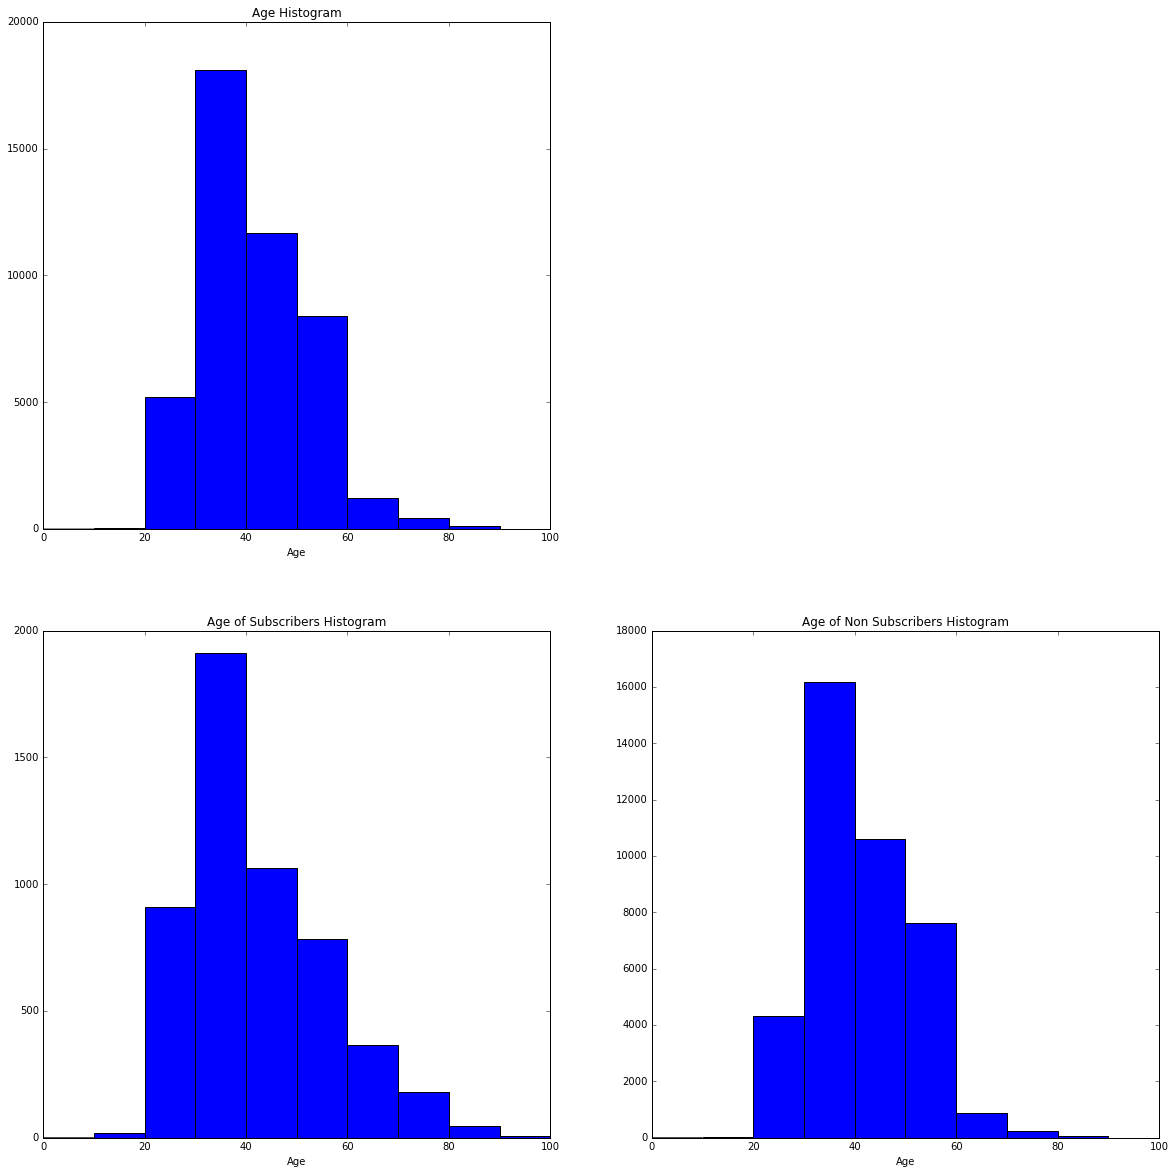

In [6]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.xlim(0, 100)
plt.hist(X_all['age'], bins=range(0,110,10))
plt.xlabel('Age')
plt.title('Age Histogram')

plt.subplot(2, 2, 3)
plt.xlim(0, 100)
subscribers = bank_data[bank_data['y']=='yes']
plt.hist(subscribers['age'], bins=range(0,110,10))
plt.xlabel('Age')
plt.title('Age of Subscribers Histogram')

plt.subplot(2, 2, 4)
plt.xlim(0, 100)
nonsubscribers = bank_data[bank_data['y']=='no']
plt.hist(nonsubscribers['age'], bins=range(0,110,10))
plt.xlabel('Age')
plt.title('Age of Non Subscribers Histogram')

plt.show()

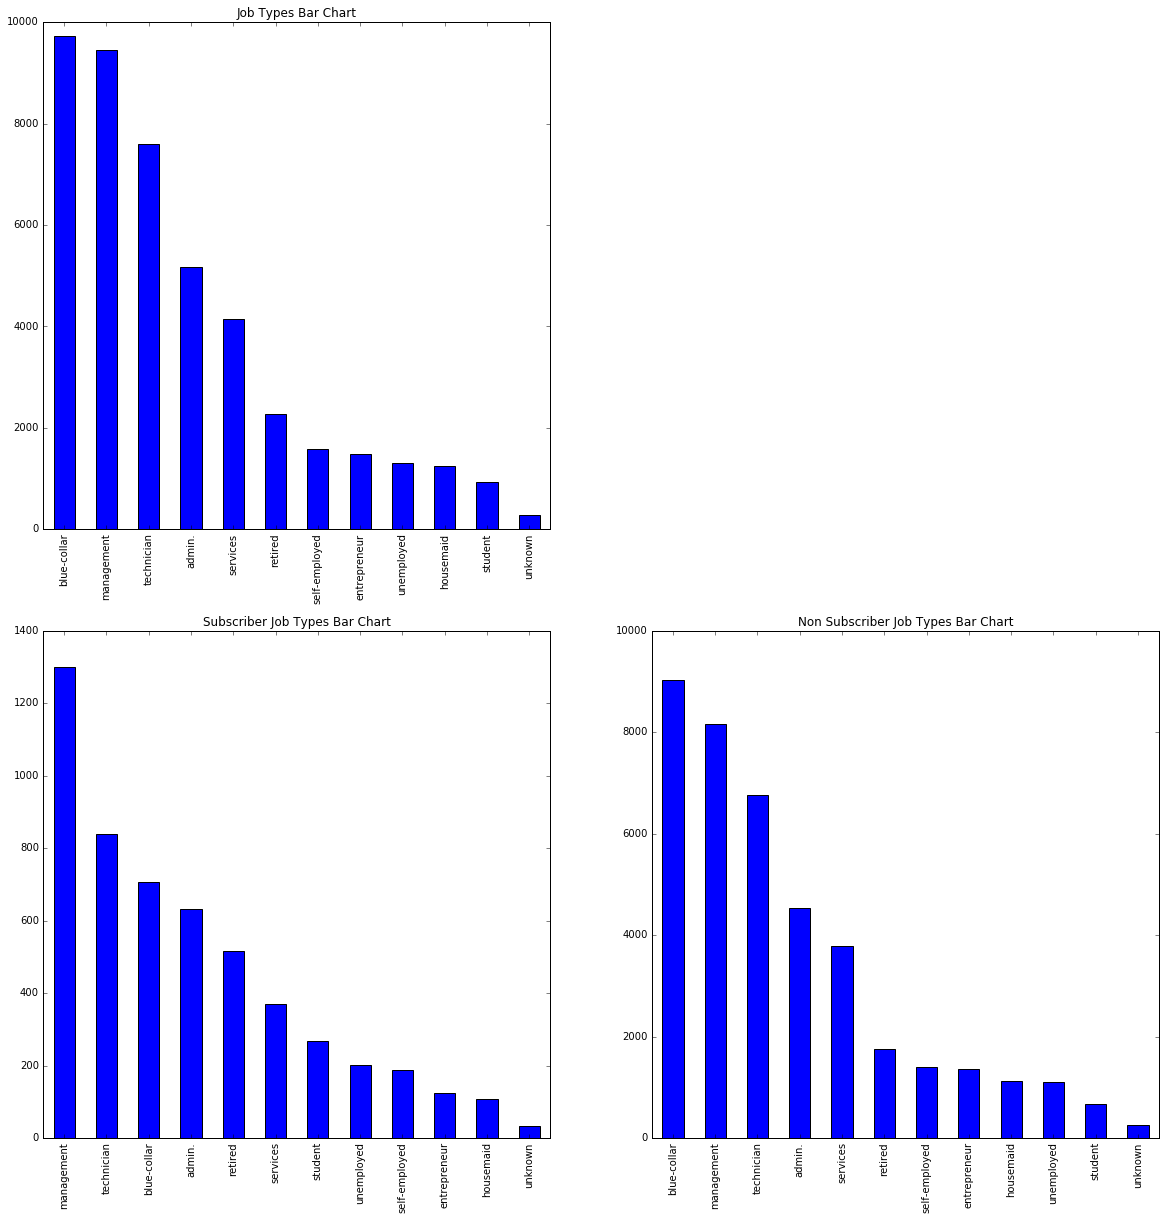

In [7]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Job Types Bar Chart')
jobs = X_all['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='bar')

plt.subplot(2, 2, 3)
plt.title('Subscriber Job Types Bar Chart')
jobs = subscribers['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='bar')

plt.subplot(2, 2, 4)
plt.title('Non Subscriber Job Types Bar Chart')
jobs = nonsubscribers['job']
job_counts = jobs.value_counts()
job_counts.plot(kind='bar')

plt.show()

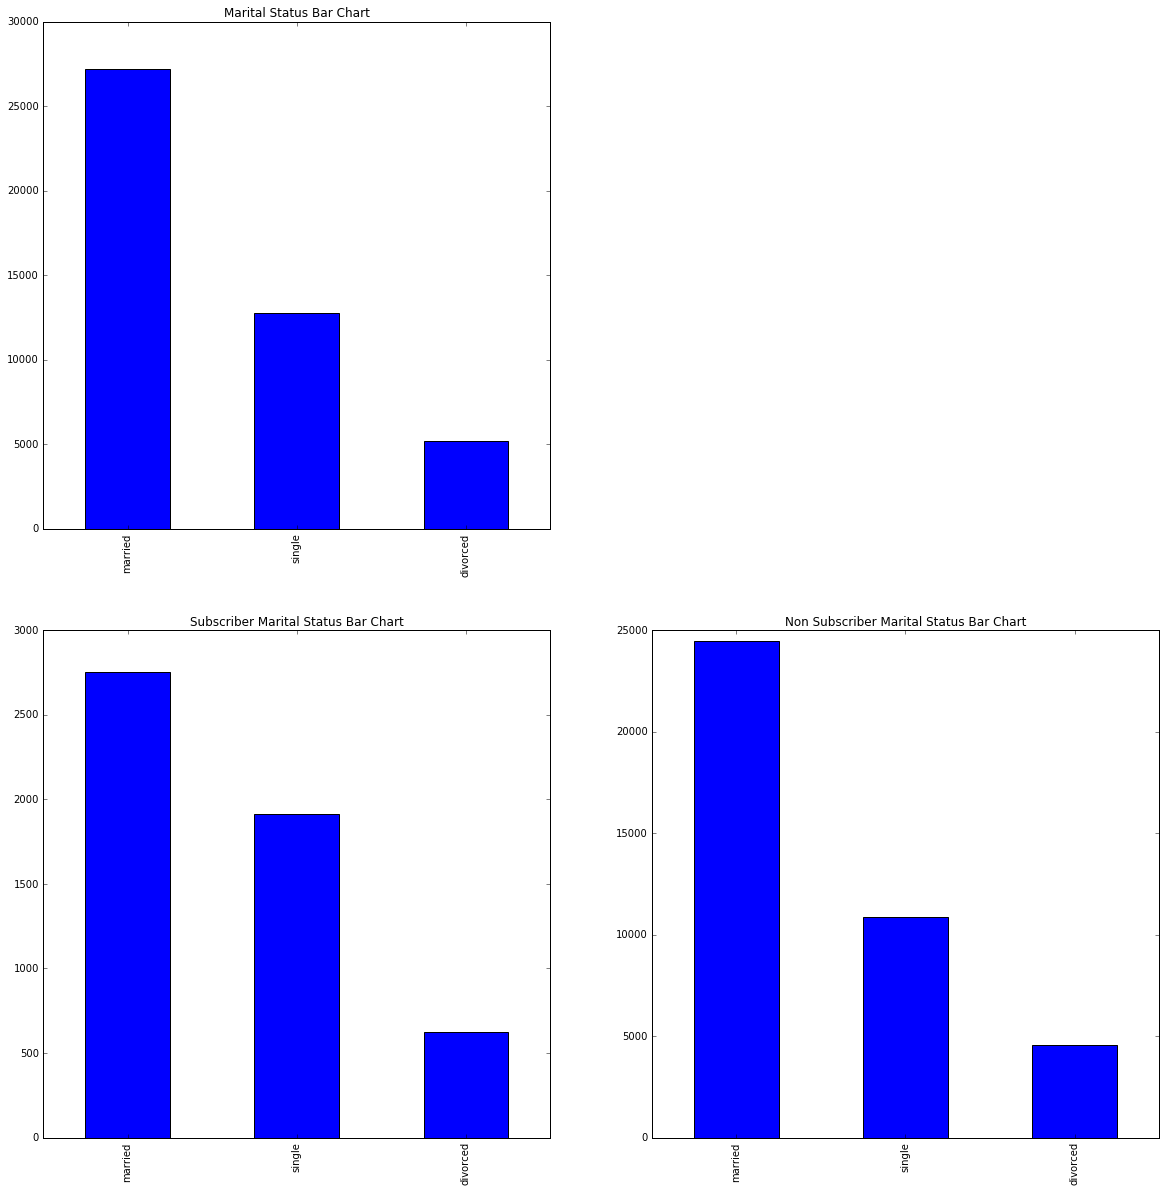

In [8]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Marital Status Bar Chart')
marriage = X_all['marital']
marriage_counts = marriage.value_counts()
marriage_counts.plot(kind='bar')

plt.subplot(2, 2, 3)
plt.title('Subscriber Marital Status Bar Chart')
marriage = subscribers['marital']
marriage_counts = marriage.value_counts()
marriage_counts.plot(kind='bar')

plt.subplot(2, 2, 4)
plt.title('Non Subscriber Marital Status Bar Chart')
marriage = nonsubscribers['marital']
marriage_counts = marriage.value_counts()
marriage_counts.plot(kind='bar')

plt.show()

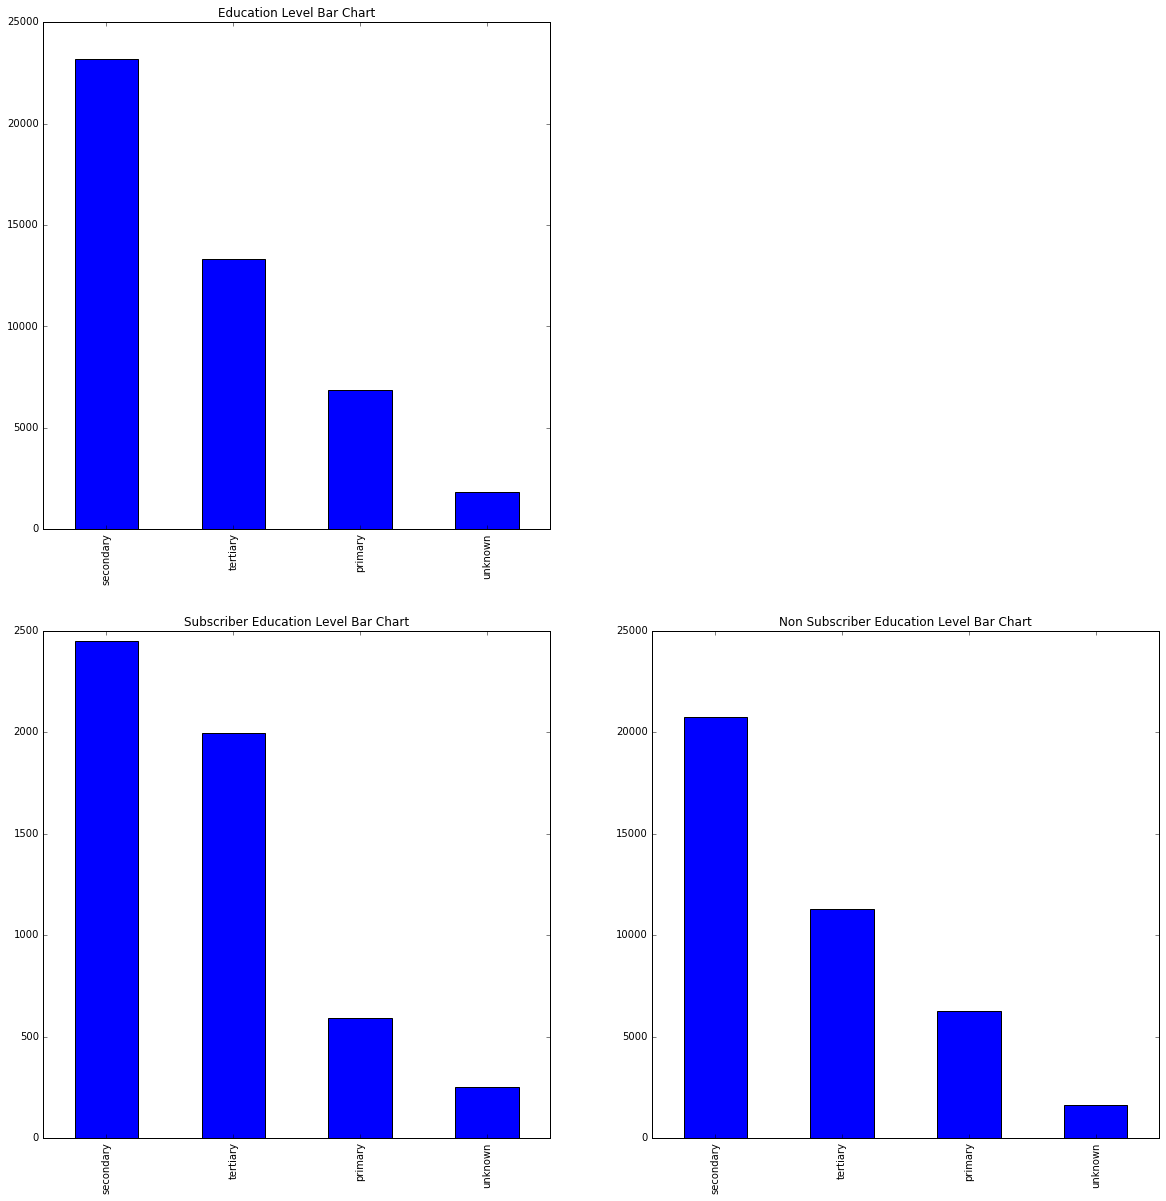

In [9]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Education Level Bar Chart')
education = X_all['education']
education_counts = education.value_counts()
education_counts.plot(kind='bar')

plt.subplot(2, 2, 3)
plt.title('Subscriber Education Level Bar Chart')
education = subscribers['education']
education_counts = education.value_counts()
education_counts.plot(kind='bar')

plt.subplot(2, 2, 4)
plt.title('Non Subscriber Education Level Bar Chart')
education = nonsubscribers['education']
education_counts = education.value_counts()
education_counts.plot(kind='bar')

plt.show()

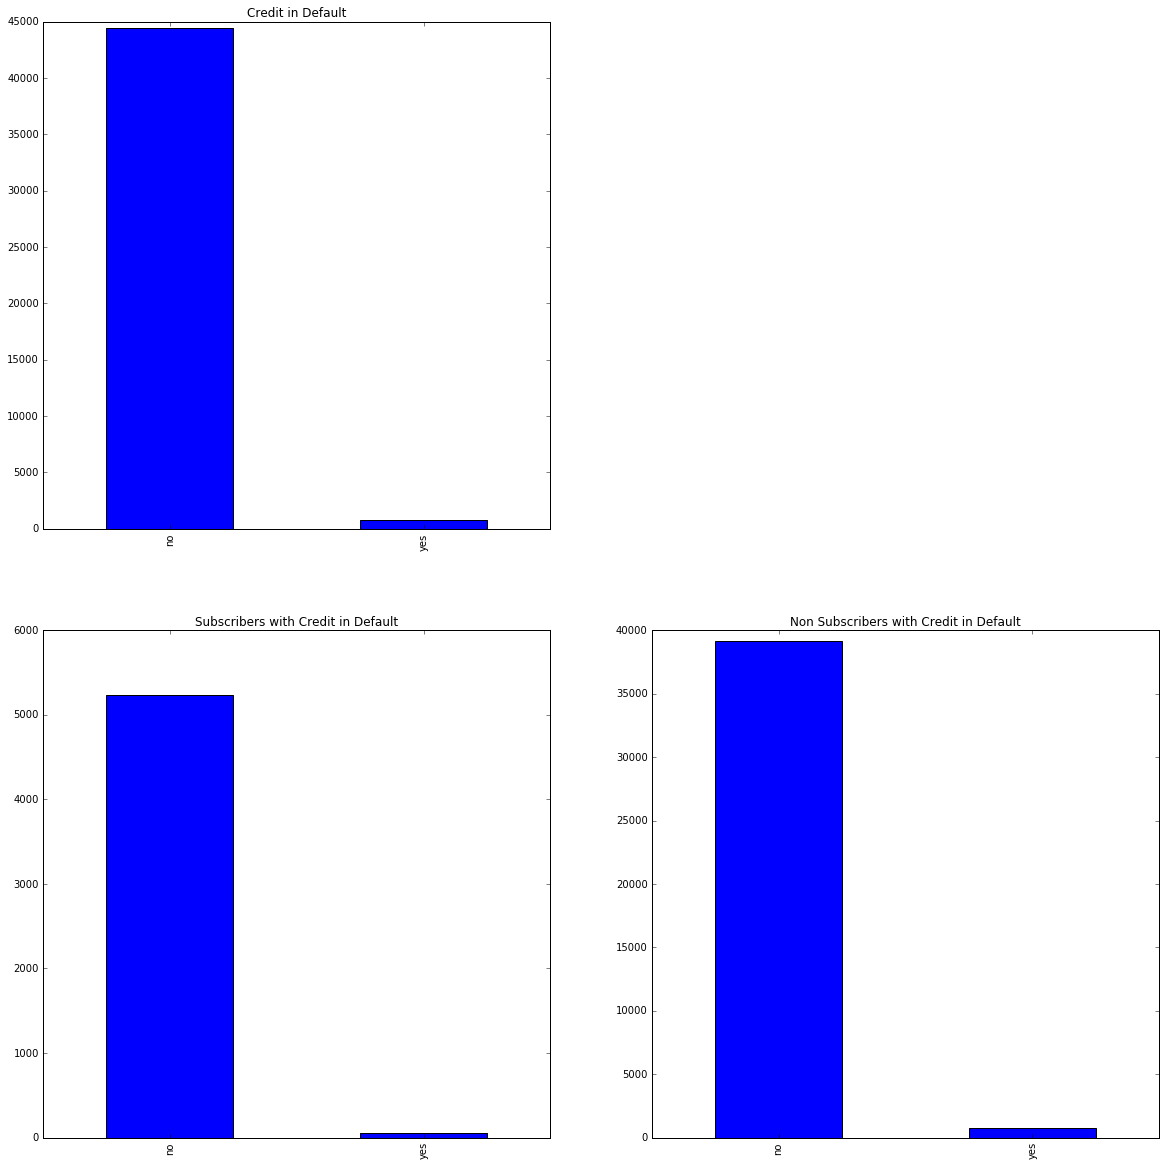

In [10]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Credit in Default')
credit = X_all['default']
credit_counts = credit.value_counts()
credit_counts.plot(kind='bar')

plt.subplot(2, 2, 3)
plt.title('Subscribers with Credit in Default')
credit = subscribers['default']
credit_counts = credit.value_counts()
credit_counts.plot(kind='bar')

plt.subplot(2, 2, 4)
plt.title('Non Subscribers with Credit in Default')
credit = nonsubscribers['default']
credit_counts = credit.value_counts()
credit_counts.plot(kind='bar')

plt.show()

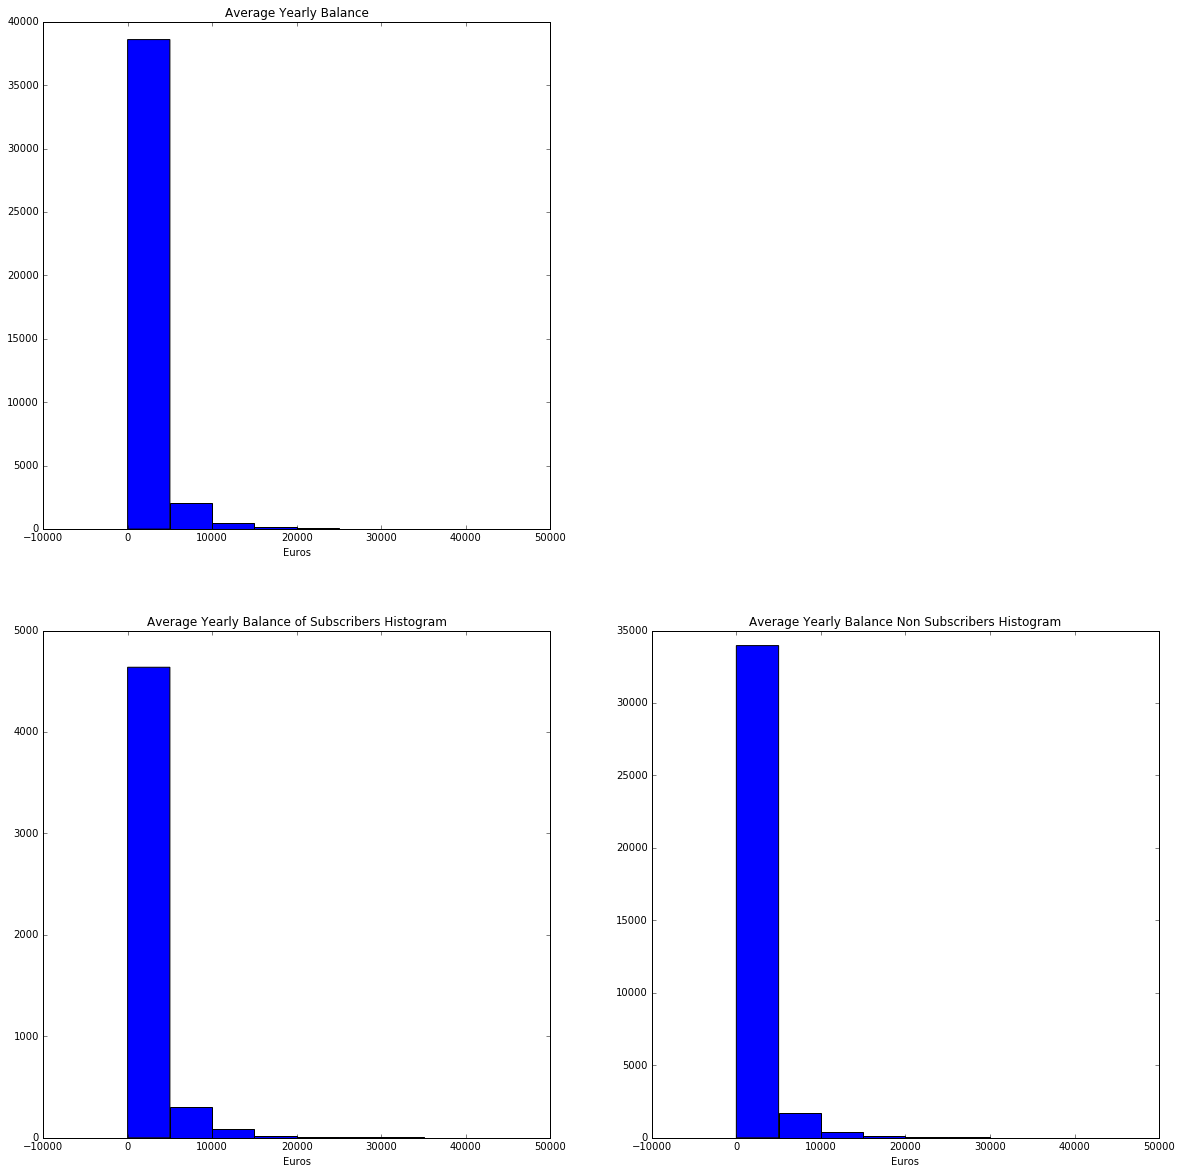

In [11]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.xlim(-10000, 50000)
plt.hist(X_all['balance'], bins=range(0,50000,5000))
plt.xlabel('Euros')
plt.title('Average Yearly Balance')

plt.subplot(2, 2, 3)
plt.xlim(-10000, 50000)
plt.hist(subscribers['balance'], bins=range(0,50000,5000))
plt.xlabel('Euros')
plt.title('Average Yearly Balance of Subscribers Histogram')

plt.subplot(2, 2, 4)
plt.xlim(-10000, 50000)
nonsubscribers = bank_data[bank_data['y']=='no']
plt.hist(nonsubscribers['balance'], bins=range(0,50000,5000))
plt.xlabel('Euros')
plt.title('Average Yearly Balance Non Subscribers Histogram')

plt.show()

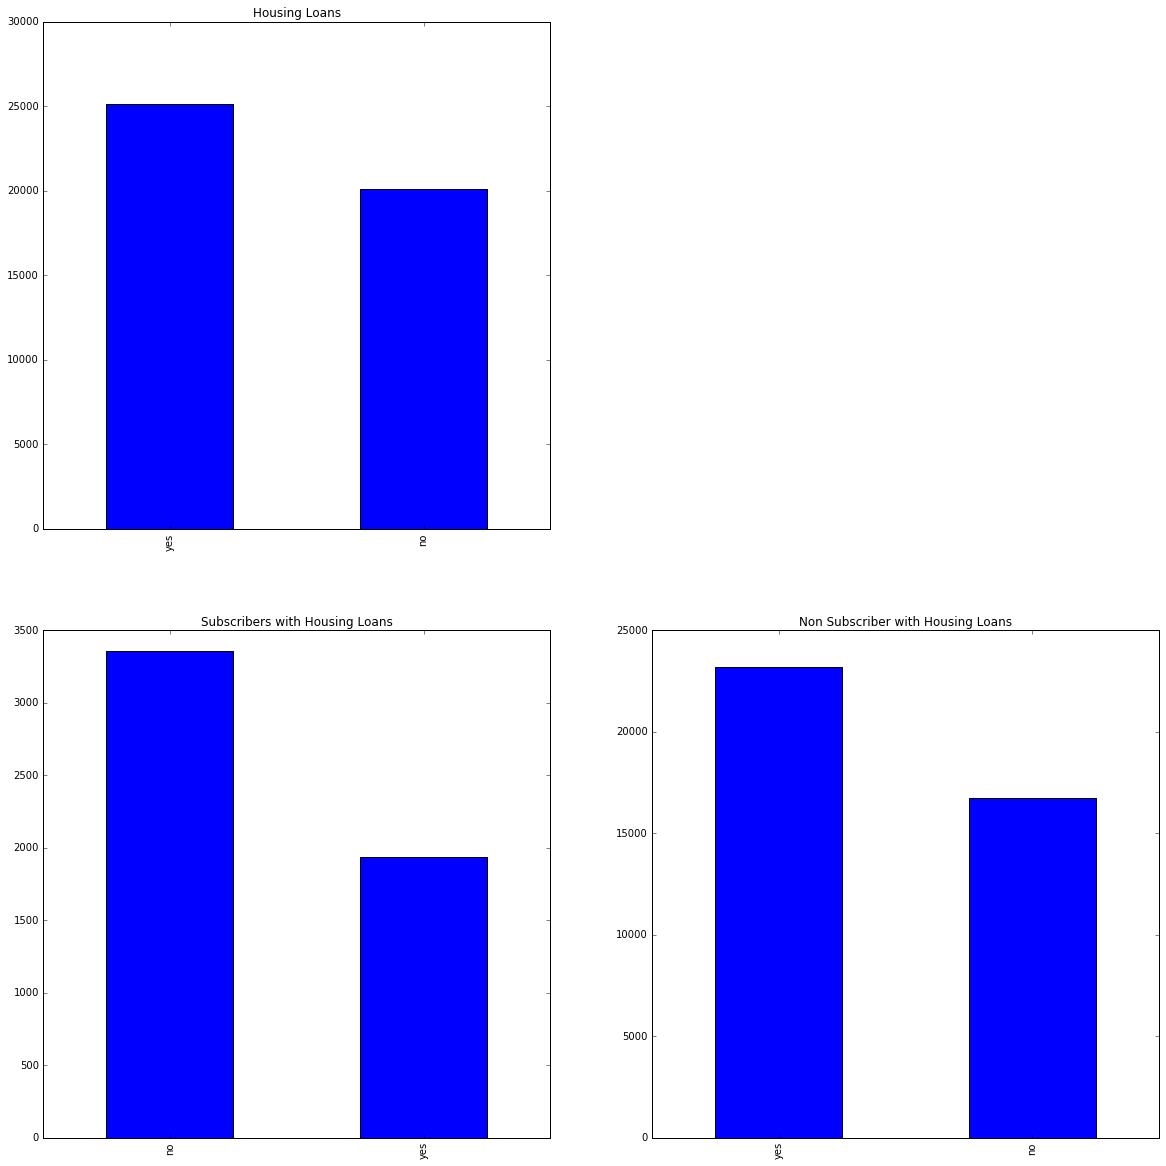

In [12]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Housing Loans')
housing = X_all['housing']
housing_counts = housing.value_counts()
housing_counts.plot(kind='bar')

plt.subplot(2, 2, 3)
plt.title('Subscribers with Housing Loans')
housing = subscribers['housing']
housing_counts = housing.value_counts()
housing_counts.plot(kind='bar')

plt.subplot(2, 2, 4)
plt.title('Non Subscriber with Housing Loans')
housing = nonsubscribers['housing']
housing_counts = housing.value_counts()
housing_counts.plot(kind='bar')

plt.show()

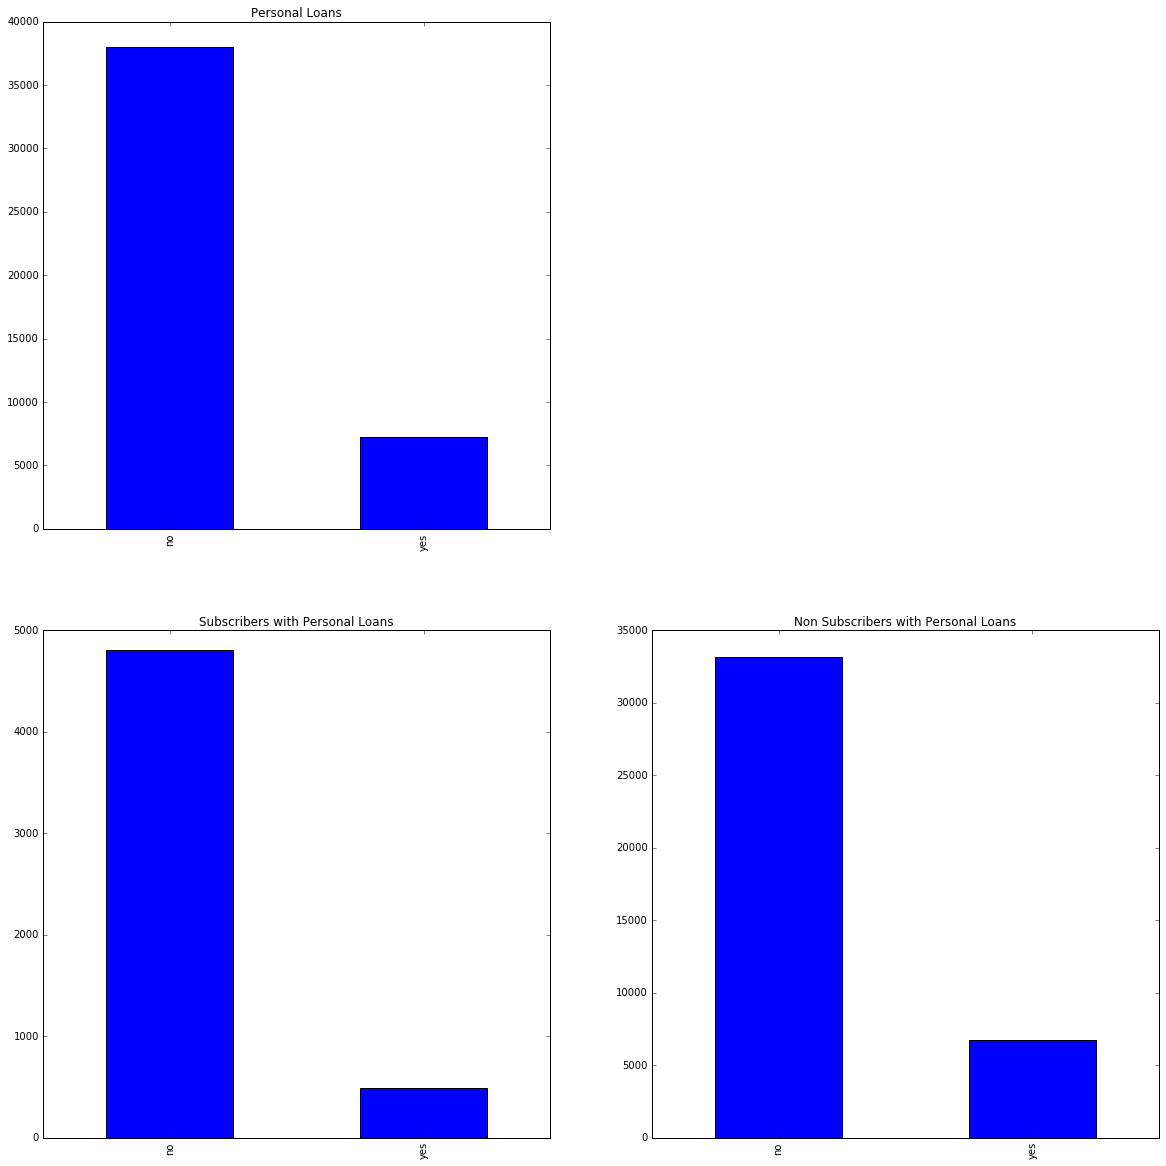

In [13]:
plt.figure(figsize=(20,20))

plt.subplot(2, 2, 1)
plt.title('Personal Loans')
loan = X_all['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.subplot(2, 2, 3)
plt.title('Subscribers with Personal Loans')
loan = subscribers['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.subplot(2, 2, 4)
plt.title('Non Subscribers with Personal Loans')
loan = nonsubscribers['loan']
loan_counts = loan.value_counts()
loan_counts.plot(kind='bar')

plt.show()

## Data Preprocessing
Convert non-numeric columns that are simply yes/no into 1/0 (binary) values.

In [14]:
# Preprocess columns
def preprocess_columns(X):
    outX = pd.DataFrame(index=X.index)  # output dataframe, initially empty

    # Check each column
    for col, col_data in X.iteritems():
        # If data type is non-numeric, try to replace all yes/no values with 1/0
        if col_data.dtype == object:
            col_data = col_data.replace(['yes', 'no'], [1, 0])
        # Note: This should change the data type for yes/no columns to int

        # If still non-numeric, convert to one or more dummy variables
        if col_data.dtype == object:
            col_data = pd.get_dummies(col_data, prefix=col)  # e.g. 'job' => 'job_admin', 'job_blue-collar'

        outX = outX.join(col_data)  # collect column(s) in output dataframe

    return outX

In [15]:
X_all = preprocess_columns(X_all)
print "Processed feature columns ({}):-\n{}".format(len(X_all.columns), list(X_all.columns))
print "\nFeature values:-"
print X_all.head()  # print the first 5 rows

Processed feature columns (48):-
['age', 'job_admin.', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_divorced', 'marital_married', 'marital_single', 'education_primary', 'education_secondary', 'education_tertiary', 'education_unknown', 'default', 'balance', 'housing', 'loan', 'contact_cellular', 'contact_telephone', 'contact_unknown', 'day', 'month_apr', 'month_aug', 'month_dec', 'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'duration', 'campaign', 'pdays', 'previous', 'poutcome_failure', 'poutcome_other', 'poutcome_success', 'poutcome_unknown']

Feature values:-
   age  job_admin.  job_blue-collar  job_entrepreneur  job_housemaid  \
0   58         0.0              0.0               0.0            0.0   
1   44         0.0              0.0               0.0       

## Implementation

In [16]:
# First, generate a balanced training set where both classes are equally represented and corresponding test set

dataset1 = subscribers.sample(n=5000)
dataset2 = nonsubscribers.sample(n=5000)
dataset3 = pd.concat([dataset1, dataset2])
print "Total number of clients used for training and test split: {}".format(len(dataset3))


X_all = dataset3[feature_cols] 
y_all = dataset3[target_col]

X_all = preprocess_columns(X_all)

# Select features (X) and corresponding labels (y) for the training and test sets
# Note: Shuffle the data or randomly select samples to avoid any bias due to ordering in the dataset
X_train, X_test, y_train, y_test = cross_validation.train_test_split(X_all, y_all, test_size=1000, \
                                                                     train_size=9000, random_state=0) 

print "Training set: {} samples".format(X_train.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
# Note: If you need a validation set, extract it from within training data

Total number of clients used for training and test split: 10000
Training set: 9000 samples
Test set: 1000 samples


### Training and Evaluating Models

In [17]:
# Train a model
import time

def train_classifier(clf, X_train, y_train):
    print "Training {}...".format(clf.__class__.__name__)
    start = time.time()
    clf.fit(X_train, y_train)
    end = time.time()
    print "Done!\nTraining time (secs): {:.3f}".format(end - start)

In [18]:
# Importing Decision Tree model and instantiating an object
from sklearn import tree
clf = tree.DecisionTreeClassifier()

# Fit model to training data
train_classifier(clf, X_train, y_train)  # note: using entire training set here
print clf  # you can inspect the learned model by printing it

Training DecisionTreeClassifier...
Done!
Training time (secs): 0.182
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')


In [19]:
# Predict on training set and compute F1 score
from sklearn.metrics import f1_score

def predict_labels(clf, features, target):
    print "Predicting labels using {}...".format(clf.__class__.__name__)
    start = time.time()
    y_pred = clf.predict(features)
    end = time.time()
    print "Done!\nPrediction time (secs): {:.3f}".format(end - start)
    return f1_score(target.values, y_pred, pos_label='yes')

train_f1_score = predict_labels(clf, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.010
F1 score for training set: 1.0


In [20]:
# Predict on test data
print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.785935884178


In [21]:
# Train and predict using different training set sizes
def train_predict(clf, X_train, y_train, X_test, y_test):
    print "------------------------------------------"
    print "Training set size: {}".format(len(X_train))
    print "Test set size: {}".format(len(X_test))
    train_classifier(clf, X_train, y_train)
    print "F1 score for training set: {}".format(predict_labels(clf, X_train, y_train))
    print "F1 score for test set: {}".format(predict_labels(clf, X_test, y_test))

# Note: Keep the test set constant

# Split on the original training set but use the original test set for prediction
X_train2, X_test2, y_train2, y_test2 = cross_validation.train_test_split(X_train, y_train, test_size=500, \
                                                                     train_size=8500, random_state=0)
#print "Training set 2: {} samples".format(X_train2.shape[0])
#print "Test set: {} samples".format(X_test.shape[0])
train_predict(clf, X_train2, y_train2, X_test, y_test)

X_train3, X_test3, y_train3, y_test3 = cross_validation.train_test_split(X_train, y_train, test_size=1000, \
                                                                     train_size=8000, random_state=0)
#print "\nTraining set 3: {} samples".format(X_train3.shape[0])
#print "Test set: {} samples".format(X_test.shape[0])
train_predict(clf, X_train3, y_train3, X_test, y_test)

------------------------------------------
Training set size: 8500
Test set size: 1000
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.151
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.008
F1 score for training set: 1.0
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.791454730417
------------------------------------------
Training set size: 8000
Test set size: 1000
Training DecisionTreeClassifier...
Done!
Training time (secs): 0.128
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.005
F1 score for training set: 1.0
Predicting labels using DecisionTreeClassifier...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.783867631851


In [22]:
# Gaussian Naive Bayes (GaussianNB)
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
train_classifier(clf3, X_train, y_train)
print clf3

train_f1_score_gnb = predict_labels(clf3, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score_gnb)

# Predict on test data
print "F1 score for test set: {}".format(predict_labels(clf3, X_test, y_test))

print "Training set 2: {} samples".format(X_train2.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
train_predict(clf3, X_train2, y_train2, X_test, y_test)

print "\nTraining set 3: {} samples".format(X_train3.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
train_predict(clf3, X_train3, y_train3, X_test, y_test)

Training GaussianNB...
Done!
Training time (secs): 0.044
GaussianNB()
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.022
F1 score for training set: 0.701421800948
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.002
F1 score for test set: 0.693548387097
Training set 2: 8500 samples
Test set: 1000 samples
------------------------------------------
Training set size: 8500
Test set size: 1000
Training GaussianNB...
Done!
Training time (secs): 0.027
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.025
F1 score for training set: 0.704255038862
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.001
F1 score for test set: 0.695150115473

Training set 3: 8000 samples
Test set: 1000 samples
------------------------------------------
Training set size: 8000
Test set size: 1000
Training GaussianNB...
Done!
Training time (secs): 0.024
Predicting labels using GaussianNB...
Done!
Prediction time (secs): 0.015
F1 scor

In [23]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
clf4 = AdaBoostClassifier()
train_classifier(clf4, X_train, y_train)
print clf4
train_f1_score = predict_labels(clf4, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)
print "F1 score for test set: {}".format(predict_labels(clf4, X_test, y_test))

train_predict(clf4, X_train2, y_train2, X_test, y_test)

print "\nTraining set 3: {} samples".format(X_train3.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
train_predict(clf4, X_train3, y_train3, X_test, y_test)

Training AdaBoostClassifier...
Done!
Training time (secs): 1.002
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.064
F1 score for training set: 0.834693193249
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.012
F1 score for test set: 0.838373305527
------------------------------------------
Training set size: 8500
Test set size: 1000
Training AdaBoostClassifier...
Done!
Training time (secs): 0.970
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.058
F1 score for training set: 0.835672997523
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.012
F1 score for test set: 0.840909090909

Training set 3: 8000 samples
Test set: 1000 samples
------------------------------------------
Training set size: 8000
Test set size: 1000
Training AdaBoostClassifier..

In [24]:
clf5 = RandomForestClassifier()
train_classifier(clf5, X_train, y_train)
print clf5
train_f1_score = predict_labels(clf5, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)
print "F1 score for test set: {}".format(predict_labels(clf5, X_test, y_test))

train_predict(clf5, X_train2, y_train2, X_test, y_test)

print "\nTraining set 3: {} samples".format(X_train3.shape[0])
print "Test set: {} samples".format(X_test.shape[0])
train_predict(clf5, X_train3, y_train3, X_test, y_test)

Training RandomForestClassifier...
Done!
Training time (secs): 0.183
RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.021
F1 score for training set: 0.993786063027
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.007
F1 score for test set: 0.846625766871
------------------------------------------
Training set size: 8500
Test set size: 1000
Training RandomForestClassifier...
Done!
Training time (secs): 0.130
Predicting labels using RandomForestClassifier...
Done!
Prediction time (secs): 0.021
F1 score for training set: 0.991551279042
Predicting labels using RandomForestCl

In [25]:
# Fine-tune best model and report the best F1 score
from sklearn import grid_search
#from sklearn.metrics import f1_score
from sklearn.metrics import make_scorer

f1_scorer = make_scorer(f1_score, pos_label="yes")

parameters = {'algorithm':('SAMME', 'SAMME.R'), 'n_estimators':[50, 75, 100, 125, 150], 'learning_rate':[0.98, 0.99, 1.0, 1.01, 1.02, 1.03, 1.04, 1.05]}

clf_gs = grid_search.GridSearchCV(clf4, parameters, scoring=f1_scorer)

train_classifier(clf_gs, X_train, y_train)
clf_gs.fit(X_train, y_train)

print "Best parameters set found on development set:"
print clf_gs.best_params_

test_f1_score_gs = predict_labels(clf_gs, X_test, y_test)
print "Grid Search F1 score for test set: {}".format(test_f1_score_gs)

Training GridSearchCV...
Done!
Training time (secs): 322.714
Best parameters set found on development set:
{'n_estimators': 125, 'learning_rate': 0.99, 'algorithm': 'SAMME.R'}
Predicting labels using GridSearchCV...
Done!
Prediction time (secs): 0.028
Grid Search F1 score for test set: 0.838174273859


## Testing Tuned Classifer Model for Robustness

In [26]:
clf_final = AdaBoostClassifier(n_estimators=150, learning_rate=1.02, algorithm='SAMME.R')
train_classifier(clf_final, X_train, y_train)
print clf_final
train_f1_score = predict_labels(clf_final, X_train, y_train)
print "F1 score for training set: {}".format(train_f1_score)
print "F1 score for test set: {}".format(predict_labels(clf_final, X_test, y_test))

train_predict(clf_final, X_train2, y_train2, X_test, y_test)
train_predict(clf_final, X_train3, y_train3, X_test, y_test)

Training AdaBoostClassifier...
Done!
Training time (secs): 2.973
AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.02, n_estimators=150, random_state=None)
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.212
F1 score for training set: 0.843045322617
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.031
F1 score for test set: 0.851851851852
------------------------------------------
Training set size: 8500
Test set size: 1000
Training AdaBoostClassifier...
Done!
Training time (secs): 2.810
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.169
F1 score for training set: 0.84471611614
Predicting labels using AdaBoostClassifier...
Done!
Prediction time (secs): 0.035
F1 score for test set: 0.854209445585
------------------------------------------
Training set size: 8000
Test set size: 1000
Training AdaBoostClassifier...
Done!
Training time (secs): 2.600
Predicting label

## Free Form Visualization

Confusion matrix, without normalization
[[441  74]
 [ 68 417]]
Normalized confusion matrix
[[ 0.86  0.14]
 [ 0.14  0.86]]


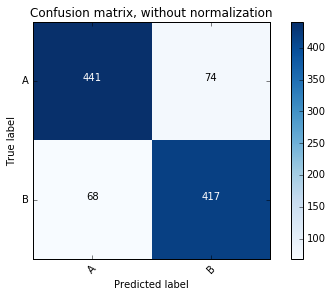

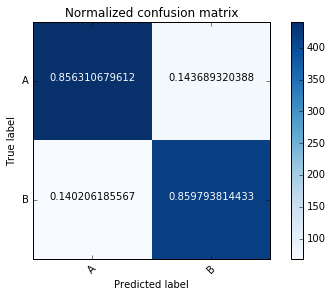

In [35]:
import itertools
from sklearn.metrics import confusion_matrix


class_names='AB'

y_pred = clf_final.predict(X_test)


def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
